## About Dataset
 This dataset contains information about iris species classification by sepal and petal size. Machine learning model is needed in order to classify the appropriate iris species based on sepal and petal size.

### Objectives 
* The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that we have the measurements
of Iris flowers categorized by their respective species. 
Objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

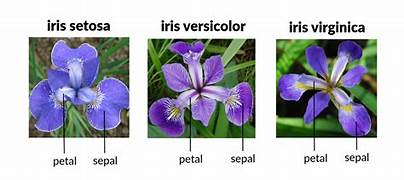

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# upload dataset
df= pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* There are 150 rows and 5 columns in this dataset.
* 5 variables : 4 are continous variables and 1 is catogorical variable..
* In the dataset there are 5 columns and 150 observations.

### Initial Data Exploration

In [9]:
df['species'].value_counts()
#df['species'].value_counts().index

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
df['species'].value_counts().index

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [11]:
# --- Descriptive Statistics ---
df.select_dtypes(include = 'float').describe().T.style.background_gradient(cmap = 'GnBu').set_properties(**{'font-family': 'Google'})

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal_width,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
petal_length,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
petal_width,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


Text(0.5, 1.03, 'Pairplot of Numerical Variables')

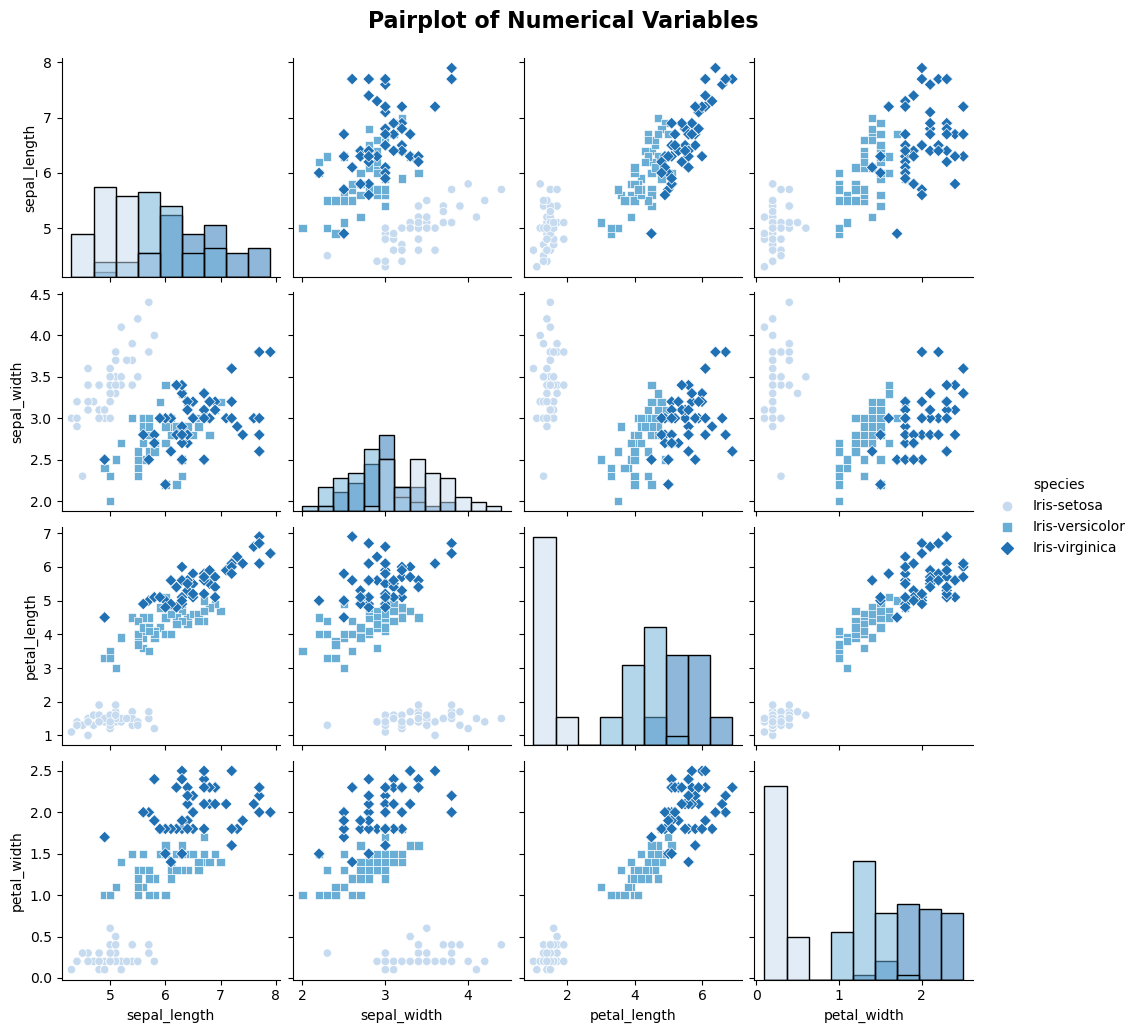

In [12]:
pairplot= sns.pairplot(df, hue = 'speciesuptitle('Pairplot of Numerical Variables', fontweight = 'heavy', y = 1.03, fontsize = '16',)
                       s', diag_kind = 'hist', palette = 'Blues', markers = ['o', 's', 'D'])
pairplot.fig.

* Iris- verginica and Iris versicolor have some overlap in its distributions(almost linearly separated) while Iris- setosa can be easily identified since it is completely linearly separated.

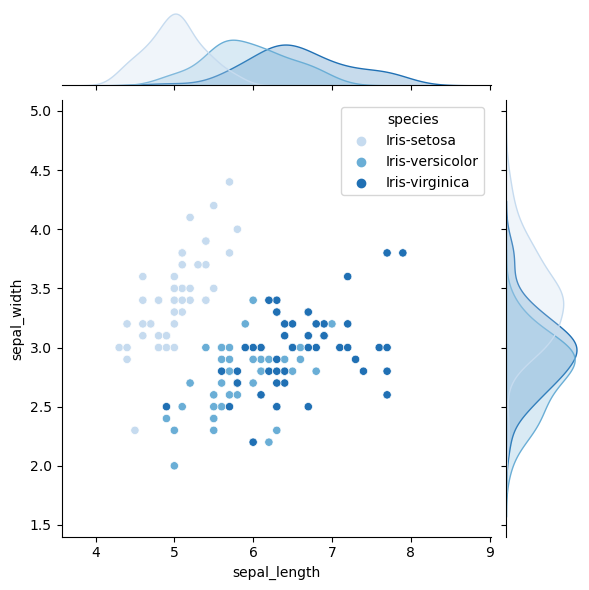

In [13]:
# joint plot
jointplot = sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = df, hue = 'species', palette = 'Blues',)

Text(0.5, 0.98, 'Correlation Map of Numerical Variables')

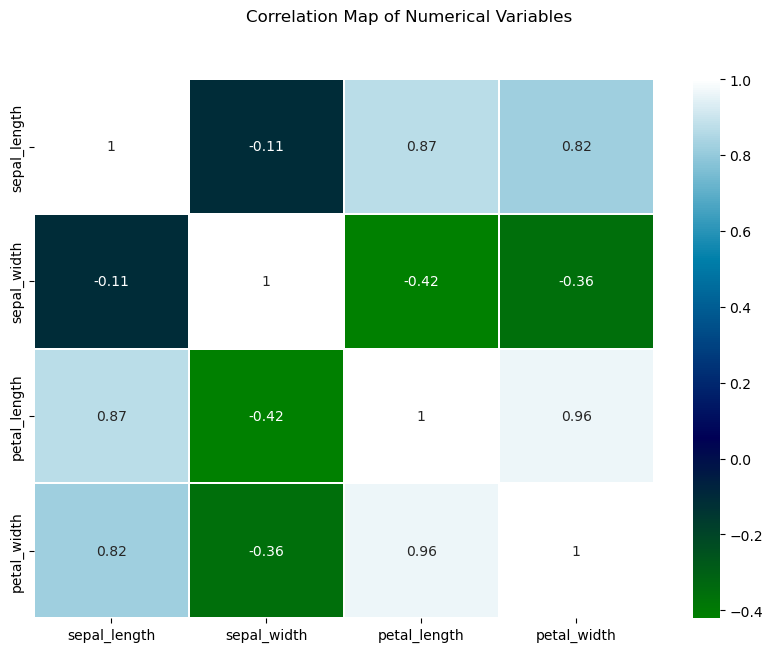

In [14]:
#Correlation Map (Heatmap) 
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True, cmap = 'ocean', linewidths = 0.1)
plt.suptitle('Correlation Map of Numerical Variables')



* Most features in the dataset are strongly correlated to each other except sepal width (has negative correlation).

In [15]:
# --- Seperating Dependent Features ---
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# --- Perform Label Encoding ---
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
# --- Label Encoding Mappings ---
idx = [0, 1, 2]
print('Target Variable After Encoding')
print('***************' * 2)
pd.DataFrame({'Label': idx, 'Target': le.classes_}, columns = ['Label', 'Target']).style.background_gradient(cmap = 'Purples').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Target Variable After Encoding
******************************


Label,Target
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


* There is shown that 'Iris-setosa' assigned as 0, 'Iris-versicolor' assigned as 1, and so on.

In [19]:
# --- Splitting Dataset into 80:20 w/ Stratified Random Sampling ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)


In [20]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Implementations
Takes 5 models like
- Logistic Regression
- Gaussian Naive Bayes
- Support vector Machine
- K- Nearest Neighbors
- Decision tree
 

## Logistic Regression
* Logistic regression is the appropriate regression analysis to conduct when the dependent variable is 
dichotomous (binary). 
*  Like all regression analyses, the logistic regression is a predictive analysis. 
*  Logistic regression is used to describe the relationship between one dependent binary variable and one or 
more nominal, ordinal, interval or ratio-level independent variables

The name "logistic regression" is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

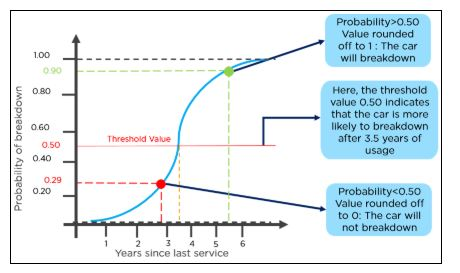

In [22]:
#Predict the data
logit =LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_pred_train)*100)

print("*****************"*10)

print(classification_report(y_train, y_pred_train))
print("*********"*10)
print(classification_report(y_test, y_pred_test))


print(confusion_matrix(y_test, y_pred_test))

Logistic Regression Accuracy: 96.66666666666667
**************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        40
           2       0.93      0.97      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

******************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00    

## Gaussian Naive Bayes
Naive Bayes Classifiers are based on the Bayes Theorem, which one assumption taken is the strong independence assumptions between the features. These classifiers assume that the value of a particular feature is independent of the value of any other feature. In a supervised learning situation, Naive Bayes Classifiers are trained very efficiently. Naive Bayes classifiers need a small training data to estimate the parameters needed for classification. Naive Bayes Classifiers have simple design and implementation and they can applied to many real life situations.

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.

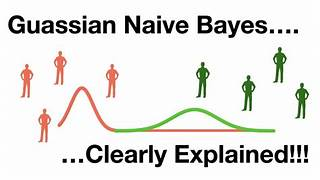

In [26]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB()
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)


In [27]:
# --- GNB Accuracy ---
#GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('Gaussian Naive Bayes Accuracy:', accuracy_score(y_pred_GNB, y_test)*100)
print("**************"*10)
print(classification_report(y_pred_GNB, y_test))
print("**************"*10)
print(confusion_matrix(y_pred_GNB, y_test))

Gaussian Naive Bayes Accuracy: 96.66666666666667
********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

********************************************************************************************************************************************
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


## Support Vector Machine
Support Vector Machine (SVM) is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.
           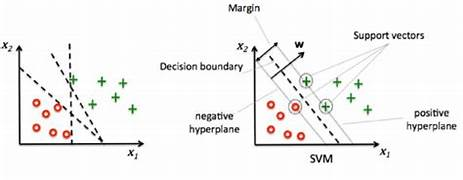

In [28]:
# --- Applying SVM ---
SVMclassifier = SVC()
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

In [29]:
print('support Vector Machine Accuracy:', accuracy_score(y_pred_SVM, y_test)*100)
print("**************"*10)
print(classification_report(y_pred_SVM, y_test))
print("**************"*10)
print(confusion_matrix(y_pred_SVM, y_test))

support Vector Machine Accuracy: 100.0
********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

********************************************************************************************************************************************
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


## K-Nearest Neighbour (KNN)
The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems.

It's called a lazy learning algorithm or lazy learner because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.
               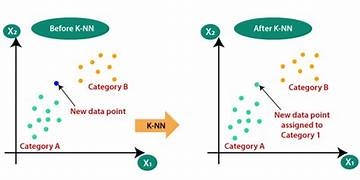

In [30]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier()
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

In [31]:
print('KNeighborsClassifier Accuracy:', accuracy_score(y_pred_KNN, y_test)*100)
print("**************"*10)
print(classification_report(y_pred_KNN, y_test))
print("**************"*10)
print(confusion_matrix(y_pred_KNN, y_test))

KNeighborsClassifier Accuracy: 100.0
********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

********************************************************************************************************************************************
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


## Decision Tree
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
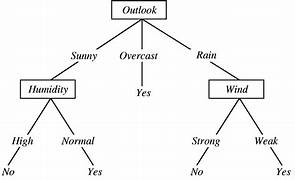

In [32]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(random_state = 0, splitter = 'random')

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

In [33]:
print('DTclassifier Accuracy:', accuracy_score(y_pred_DTC, y_test)*100)
print("**************"*10)
print(classification_report(y_pred_DTC, y_test))
print("**************"*10)
print(confusion_matrix(y_pred_DTC, y_test))

DTclassifier Accuracy: 100.0
********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

********************************************************************************************************************************************
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


*  Results:- It could be seen that decision tree, KNN and support vector machine could achieve 100% accuracy.

In [34]:
# --- Prediction using Decision Tree ---
pred_DT = DTCclassifier.predict(x_test)

# --- Make Data Copy From Test Set ---
sepal_length = x_test[:,0]
sepal_width = x_test[:,1]
petal_length = x_test[:,2]
petal_width = x_test[:,3]

# --- Reverse Label Encoding ---
pred_DT = np.select([pred_DT == 0, pred_DT == 1, pred_DT == 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                    pred_DT)

# --- Assign Output Data Frame ---
output = pd.DataFrame({'sepal_length': sepal_length, 'sepal_width': sepal_width, 'petal_length': petal_length, 
                       'petal_width': petal_width,
                       'species': pred_DT})

# --- Display Output Result ---
output.head().style.background_gradient(cmap = 'BuGn').hide_index().set_properties(**{'font-family': 'Segoe UI'})

sepal_length,sepal_width,petal_length,petal_width,species
5.500000,3.500000,1.300000,0.200000,Iris-setosa
5.700000,2.800000,4.500000,1.300000,Iris-versicolor
5.100000,3.800000,1.900000,0.400000,Iris-setosa
6.100000,2.600000,5.600000,1.400000,Iris-virginica
5.100000,3.400000,1.500000,0.200000,Iris-setosa


 

## Conclusion
- I did work on Iris flower dataset consists of three species: setosa, versicolor, and virginica.
- Objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
- Mostly features in the dataset are strongly correlated to each other except sepal width (has negative correlation).
- I have applied supervised machine learning models like Logistic Regression,Gaussian Naive Bayes,Support vector Machine,K- Nearest Neighbors and Decision tree.In which I have find of 3 models of accuracy 100%. It's means result is good.
- Project completed.